In [1]:
import pandas as pd
df = pd.read_csv("kbo_21_24_merged.csv", encoding='cp949')

In [2]:
df.head(3)

,연도,순위,선수명,팀명,AVG,G,PA,AB,R,H,...,경기수,팀승수,팀패수,팀무승부수,팀승률,팀게임차,포지션,투구유형,타격유형,출생연도
0,2021,1,이정후,키움,0.360,123,544,464,78,167,...,144,70,67,7,0.511,7.0,외야수,우투,좌타,1998
1,2021,2,전준우,롯데,0.348,144,619,552,88,192,...,144,65,71,8,0.478,11.5,외야수,우투,우타,1986
2,2021,3,강백호,KT,0.347,142,627,516,76,179,...,144,76,59,9,0.563,0.0,내야수,우투,좌타,1999


In [5]:
df.tail(3)

,연도,순위,선수명,팀명,AVG,G,PA,AB,R,H,...,경기수,팀승수,팀패수,팀무승부수,팀승률,팀게임차,포지션,투구유형,타격유형,출생연도
210,2024,54,김주원,NC,0.252,134,475,385,61,97,...,144,61,81,2,0.430,26.0,내야수,우투,양타,2002
211,2024,55,양석환,두산,0.246,142,593,533,83,131,...,144,74,68,2,0.521,13.0,내야수,우투,우타,1991
212,2024,56,한유섬,SSG,0.235,132,523,464,64,109,...,144,72,70,2,0.507,15.0,외야수,우투,좌타,1989


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 52 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   연도      213 non-null    int64   
 1   순위      213 non-null    int64   
 2   선수명     213 non-null    object  
 3   팀명      213 non-null    object  
 4   AVG     213 non-null    float64 
 5   G       213 non-null    int64   
 6   PA      213 non-null    int64   
 7   AB      213 non-null    int64   
 8   R       213 non-null    int64   
 9   H       213 non-null    int64   
 10  2B      213 non-null    int64   
 11  3B      213 non-null    int64   
 12  HR      213 non-null    int64   
 13  TB      213 non-null    int64   
 14  RBI     213 non-null    int64   
 15  SAC     213 non-null    int64   
 16  SF      213 non-null    int64   
 17  BB      213 non-null    int64   
 18  IBB     213 non-null    int64   
 19  HBP     213 non-null    int64   
 20  SO      213 non-null    int64   
 21  GDP     213 non-

In [14]:
df.columns.tolist()

['연도',
 '순위',
 '선수명',
 '팀명',
 'AVG',
 'G',
 'PA',
 'AB',
 'R',
 'H',
 '2B',
 '3B',
 'HR',
 'TB',
 'RBI',
 'SAC',
 'SF',
 'BB',
 'IBB',
 'HBP',
 'SO',
 'GDP',
 'SLG',
 'OBP',
 'OPS',
 'MH',
 'RISP',
 'PH-BA',
 'XBH',
 'GO',
 'AO',
 'GO/AO',
 'GW RBI',
 'BB/K',
 'P/PA',
 'ISOP',
 'XR',
 'GPA',
 '팀순위',
 '경기수',
 '팀승수',
 '팀패수',
 '팀무승부수',
 '팀승률',
 '팀게임차',
 '포지션',
 '투구유형',
 '타격유형',
 '출생연도']

## 범주형 변수

컬럼 dtype 종류

In [63]:
df.dtypes.astype(str).unique().tolist()

['int64', 'object', 'float64', 'category']

dtype이 object인 열

In [58]:
columns = df.select_dtypes(include=object).columns
columns.tolist()

['선수명', '팀명', '포지션', '투구유형', '타격유형']

### 팀명 변수

#### 연도별 각 팀 소속 선수 수

In [4]:
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')

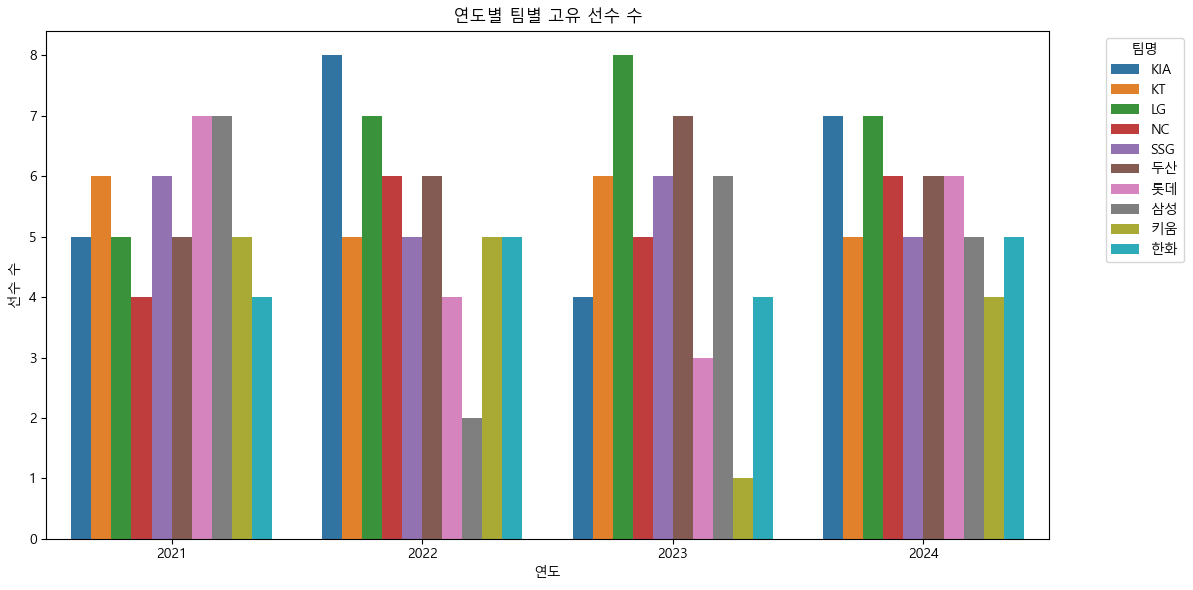

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기
df = pd.read_csv("kbo_21_24_merged.csv", encoding='cp949')

# 연도별 팀별 선수 수
team_counts = df.groupby(['연도', '팀명'])['선수명'].nunique().reset_index()
team_counts.columns = ['연도', '팀명', '선수수']

# 시각화: 연도별 팀별 선수 수 (grouped bar chart)
plt.figure(figsize=(12, 6))
sns.barplot(data=team_counts, x='연도', y='선수수', hue='팀명')
plt.title('연도별 팀별 고유 선수 수')
plt.ylabel('선수 수')
plt.xlabel('연도')
plt.legend(title='팀명', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

2023년에 키움 선수 왜 1명이지

#### 평균 팀 순위

In [9]:
team_rank_mean = df.groupby('팀명')['팀순위'].mean().sort_values()
team_rank_mean

팀명
LG     2.333333
KT     2.863636
SSG    4.045455
삼성     4.300000
KIA    4.833333
두산     5.333333
키움     6.000000
NC     6.571429
롯데     7.550000
한화     9.222222
Name: 팀순위, dtype: float64

### 포지션 변수

#### 포지션 빈도수

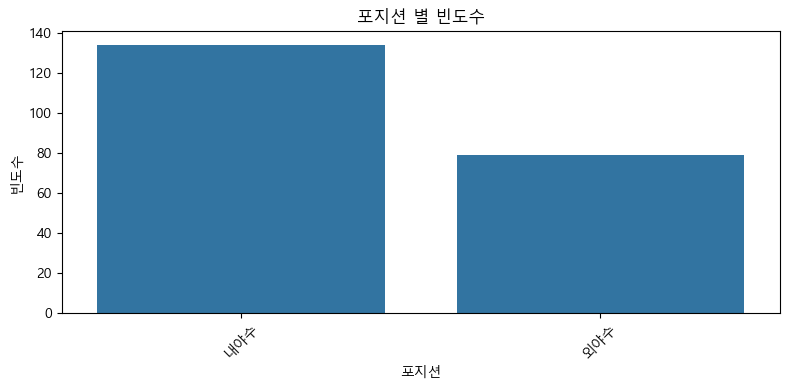

In [11]:

pos_counts = df['포지션'].value_counts()
plt.figure(figsize=(8, 4))
sns.barplot(x=pos_counts.index, y=pos_counts.values)
plt.title('포지션 별 빈도수')
plt.ylabel('빈도수')
plt.xlabel('포지션')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 포지션별 OPS 지표 평균

In [12]:
pos_ops_mean = df.groupby('포지션')['OPS'].mean().sort_values(ascending=False)
print(pos_ops_mean)

포지션
외야수    0.801063
내야수    0.789381
Name: OPS, dtype: float64


### 투구유형 변수

투구유형 빈도수

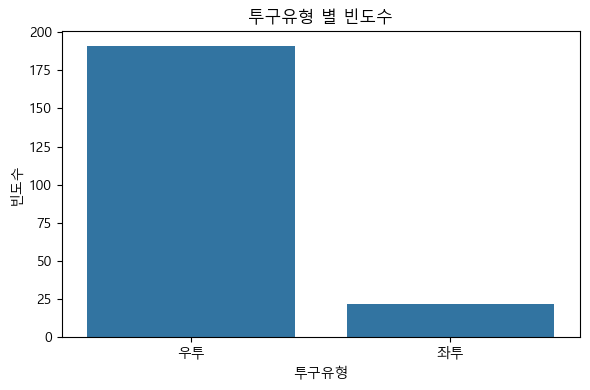

In [14]:
pitch_type_counts = df['투구유형'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=pitch_type_counts.index, y=pitch_type_counts.values)
plt.title('투구유형 별 빈도수')
plt.ylabel('빈도수')
plt.xlabel('투구유형')
plt.tight_layout()
plt.show()


투구유형별 SO 삼진 비율 평균

In [16]:
pitch_so_mean = df.groupby('투구유형')['SO'].mean().sort_values(ascending=False)
print(pitch_so_mean)

투구유형
좌투    89.227273
우투    84.439791
Name: SO, dtype: float64


### 타격유형 변수

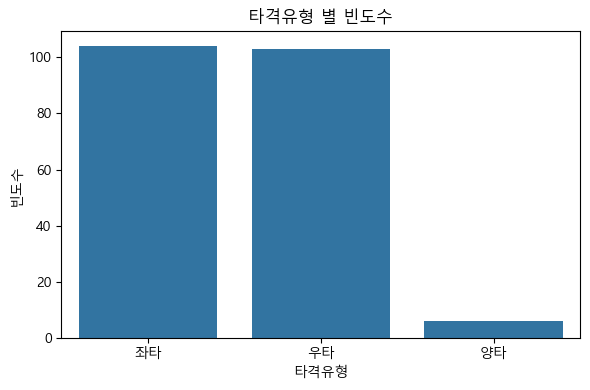

In [17]:
# 타격유형 빈도수 시각화
bat_type_counts = df['타격유형'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=bat_type_counts.index, y=bat_type_counts.values)
plt.title('타격유형 별 빈도수')
plt.ylabel('빈도수')
plt.xlabel('타격유형')
plt.tight_layout()
plt.show()

타격유형별 OPS 평균

In [18]:
bat_ops_mean = df.groupby('타격유형')['OPS'].mean().sort_values(ascending=False)
print(bat_ops_mean)

타격유형
양타    0.830000
우타    0.797757
좌타    0.787615
Name: OPS, dtype: float64


### [1] 팀별 포지션 분포 분석 - 막대 그래프 (barplot)

In [19]:
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')

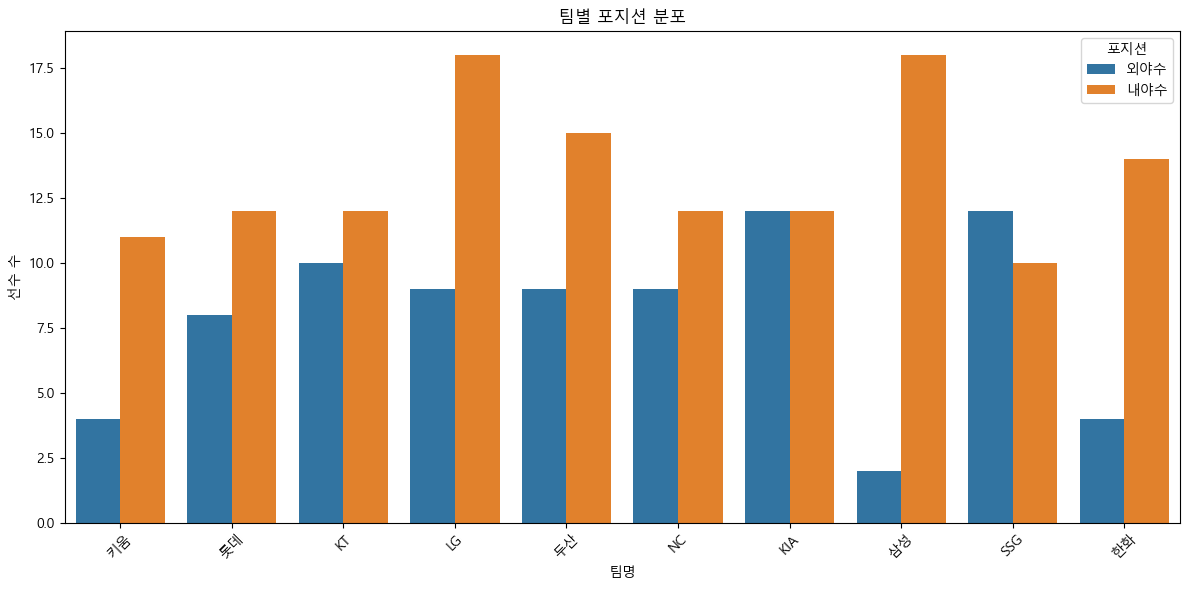

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='팀명', hue='포지션')
plt.title('팀별 포지션 분포')
plt.xlabel('팀명')
plt.ylabel('선수 수')
plt.legend(title='포지션')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### [2] 팀별 타격유형 구성 비율 - 파이 그래프 (pie chart)

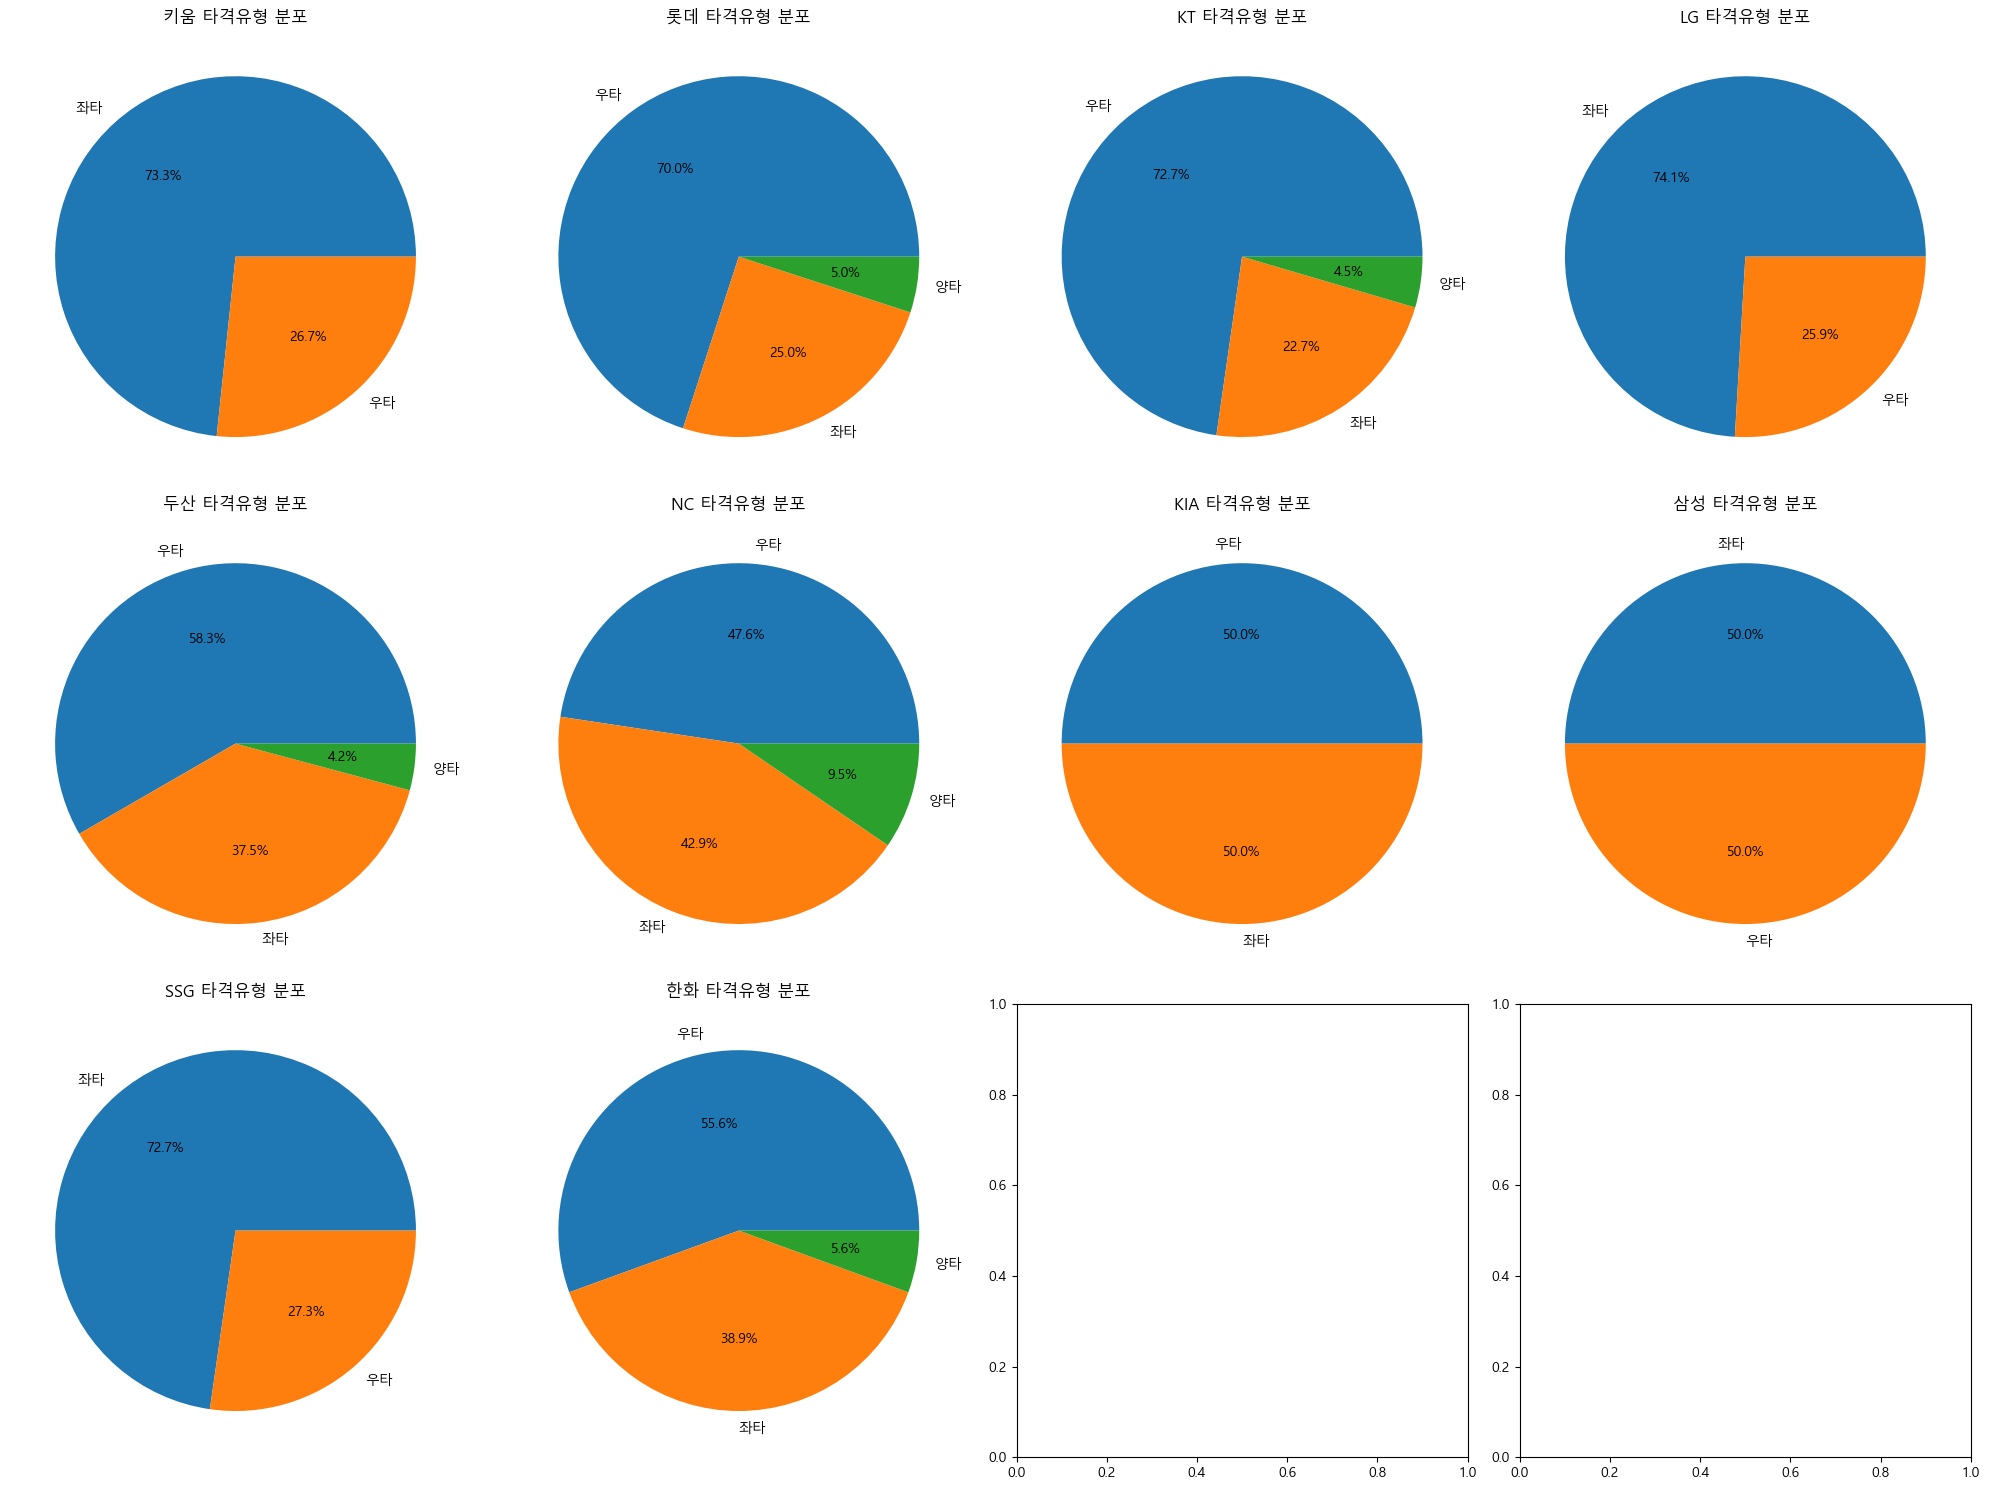

In [28]:
teams = df['팀명'].unique()
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))
axes = axes.flatten()

for i, team in enumerate(teams):
    subset = df[df['팀명'] == team]
    type_counts = subset['타격유형'].value_counts()
    axes[i].pie(type_counts, labels=type_counts.index, autopct='%1.1f%%')
    axes[i].set_title(f'{team} 타격유형 분포')

plt.tight_layout()
plt.show()


### [3] 팀별 시즌별 순위 분포 - 라인 플롯 (lineplot)

순위 열 unique

In [33]:
df['순위'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 54, 21, 55, 56])

팀순위 열 unique

In [ ]:
df['팀순위'].unique()

array([ 5,  8,  1,  4,  3,  7,  9,  2,  6, 10])

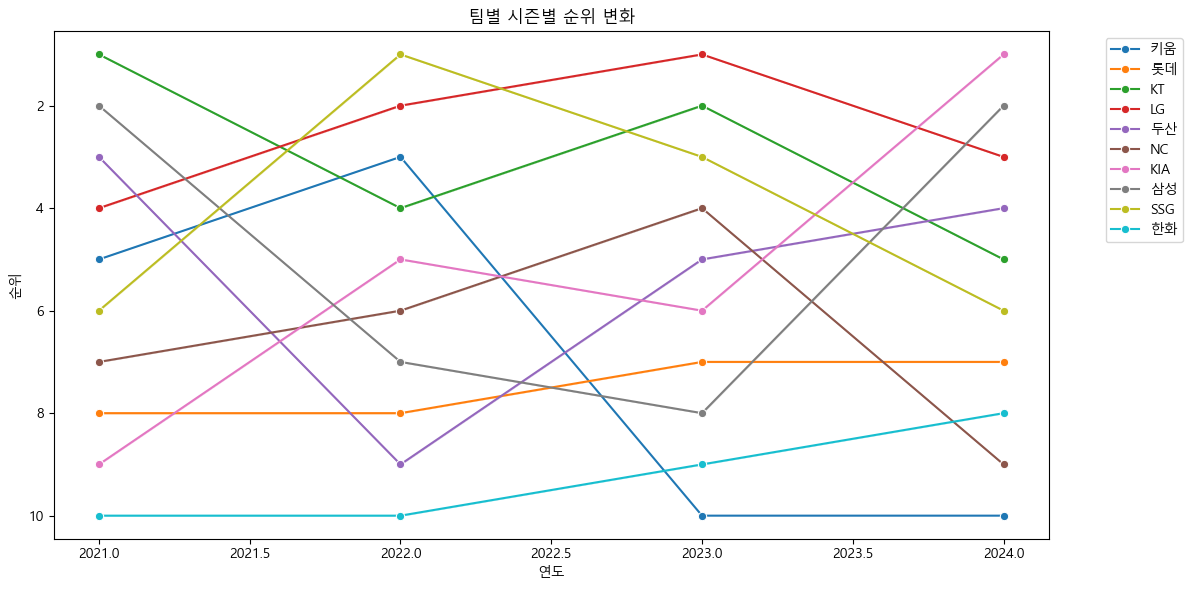

In [53]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='연도', y='팀순위', hue='팀명', marker='o')
plt.title('팀별 시즌별 순위 변화')
plt.ylabel('순위')
plt.gca().invert_yaxis()  # 순위는 낮을수록 상위이므로 뒤집기
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

연도별 행 수

In [51]:
years = df['연도'].value_counts().sort_index()
years

연도
2021    54
2022    53
2023    50
2024    56
Name: count, dtype: int64

###  [4] 팀별 연령대 구성 분포 - 카운트 플롯 (countplot)

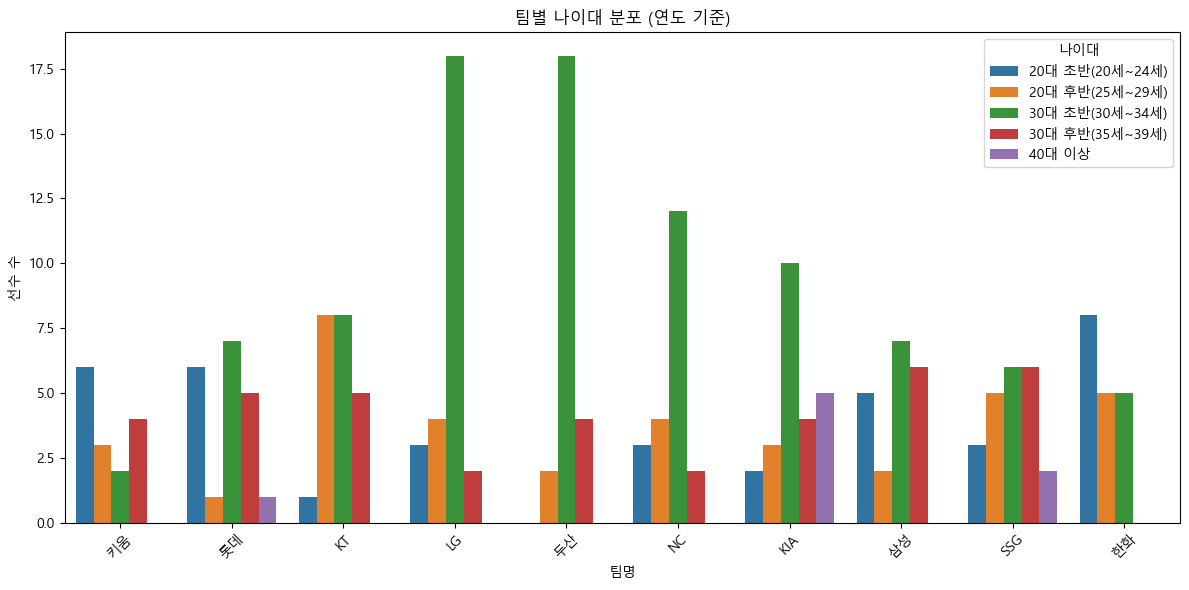

In [47]:
df['나이'] = df['연도'] - df['출생연도']

df['나이대'] = pd.cut(df['나이'], bins=[0, 24, 29, 34, 39, 100], labels=['20대 초반(20세~24세)','20대 후반(25세~29세)', '30대 초반(30세~34세)', '30대 후반(35세~39세)', '40대 이상'])

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='팀명', hue='나이대')
plt.title('팀별 나이대 분포 (연도 기준)')
plt.xlabel('팀명')
plt.ylabel('선수 수')
plt.xticks(rotation=45)
plt.legend(title='나이대')
plt.tight_layout()
plt.show()

팀별 선수 수 확인

In [54]:
counts = df['팀명'].value_counts().sort_values()
counts


팀명
키움     15
한화     18
삼성     20
롯데     20
NC     21
KT     22
SSG    22
두산     24
KIA    24
LG     27
Name: count, dtype: int64

## 연속형 변수

In [23]:
df.isna().sum()

연도        0
순위        0
선수명       0
팀명        0
AVG       0
G         0
PA        0
AB        0
R         0
H         0
2B        0
3B        0
HR        0
TB        0
RBI       0
SAC       0
SF        0
BB        0
IBB       0
HBP       0
SO        0
GDP       0
SLG       0
OBP       0
OPS       0
MH        0
RISP      0
PH-BA     0
XBH       0
GO        0
AO        0
GO/AO     0
GW RBI    0
BB/K      0
P/PA      0
ISOP      0
XR        0
GPA       0
팀순위       0
경기수       0
팀승수       0
팀패수       0
팀무승부수     0
팀승률       0
팀게임차      0
포지션       0
투구유형      0
타격유형      0
출생연도      0
dtype: int64

### 수치형 변수 간 상관관계 히트맵

c:\Users\chica\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.draw()
C:\Users\chica\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


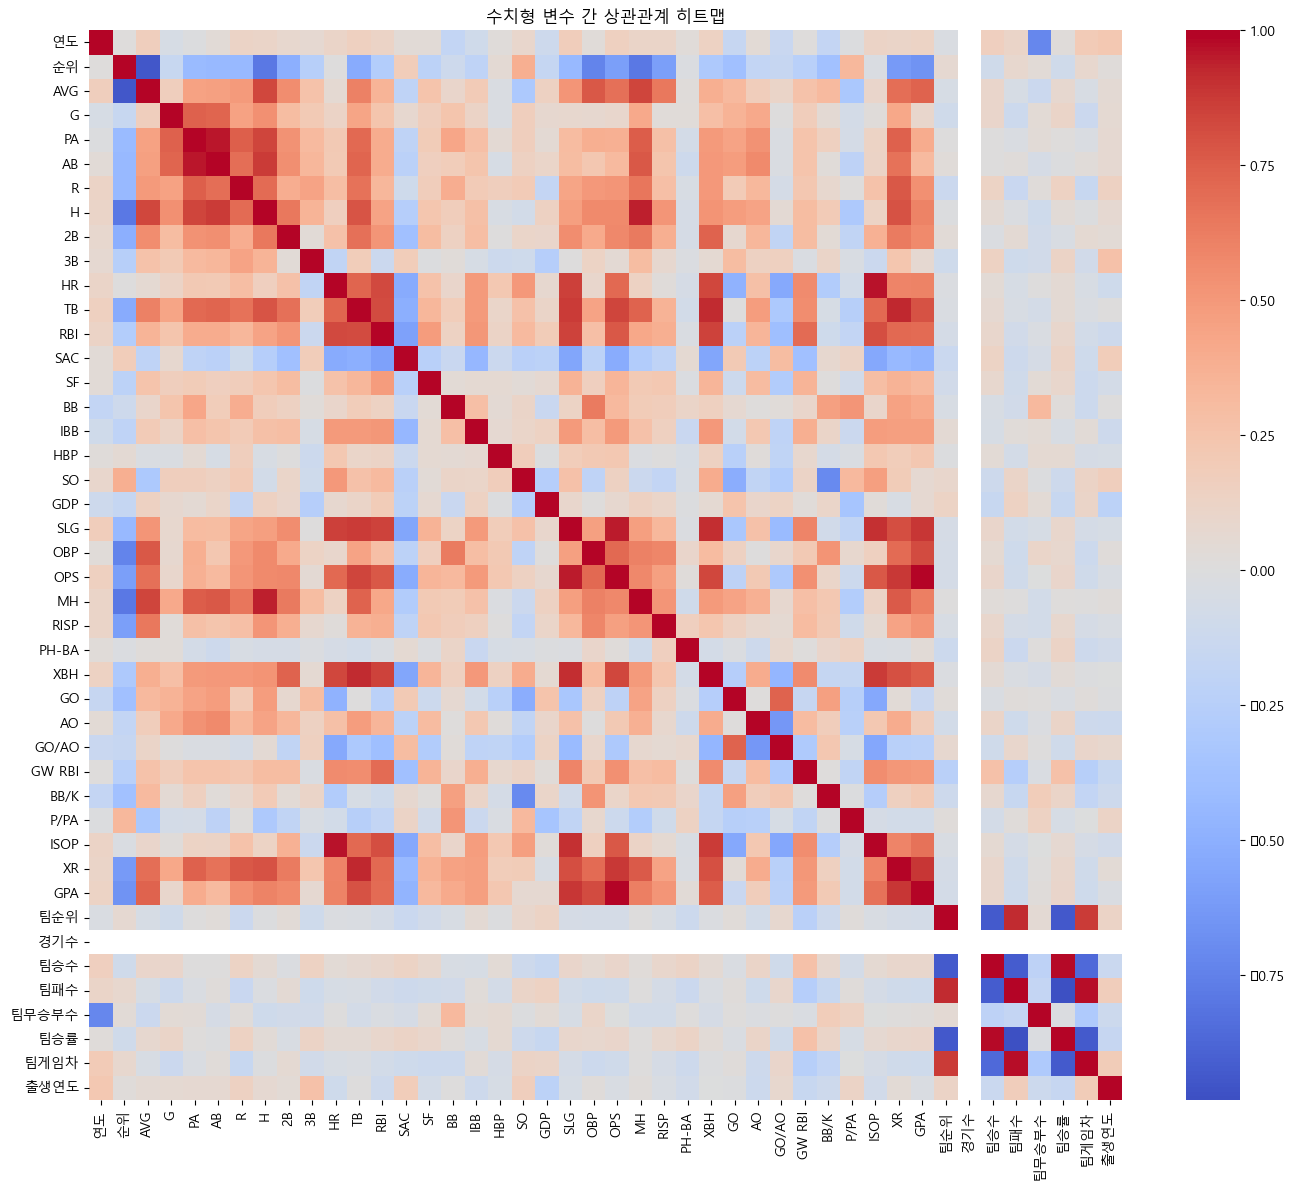

In [24]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
numeric_summary = numeric_df.describe().T.sort_values(by='std', ascending=False)

# 상관관계 행렬 계산
corr_matrix = numeric_df.corr()

# 상관계수 히트맵
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, annot=False)
plt.title('수치형 변수 간 상관관계 히트맵')
plt.tight_layout()
plt.show()

상관계수 수치로 top 20 보기

In [26]:
# 상관관계 행렬 재계산 (불필요한 반복 피함)
corr_matrix = numeric_df.corr()

# 상관계수 절댓값 기준으로 정렬하기 위해 행렬을 풀어서 시리즈로 변환
corr_pairs = corr_matrix.unstack()

# 자기 자신과의 상관 제외하고 절댓값 기준 상위 n개 추출
corr_pairs = corr_pairs[corr_pairs.index.get_level_values(0) != corr_pairs.index.get_level_values(1)]
top_corr = corr_pairs.abs().sort_values(ascending=False).drop_duplicates().head(20)

# 실제 상관계수 값으로 재정렬
top_corr_values = corr_pairs[top_corr.index]

# 데이터프레임으로 정리
top_corr_df = pd.DataFrame({
    '변수1': [i[0] for i in top_corr_values.index],
    '변수2': [i[1] for i in top_corr_values.index],
    '상관계수': top_corr_values.values
})

top_corr_df

,변수1,변수2,상관계수
0,OPS,GPA,0.986819
1,팀승률,팀승수,0.981270
2,팀패수,팀승률,-0.981010
3,팀게임차,팀패수,0.976425
4,HR,ISOP,0.965871
5,AB,PA,0.961111
6,SLG,OPS,0.951362
7,AVG,순위,-0.949016
8,H,MH,0.942685
9,팀승률,팀순위,-0.940804


### [1] 팀별 OPS 평균 및 표준편차 계산

In [77]:
ops_stats = df.groupby('팀명')['OPS'].agg(['mean', 'median', 'std']).reset_index().sort_values(by='mean')
ops_stats

,팀명,mean,median,std
1,KT,0.766045,0.7525,0.096145
9,한화,0.768278,0.7915,0.080191
5,두산,0.779667,0.7935,0.067941
0,KIA,0.784458,0.7660,0.091116
2,LG,0.791593,0.7910,0.070650
8,키움,0.801200,0.7760,0.102124
7,삼성,0.806100,0.8085,0.106928
6,롯데,0.810550,0.8175,0.062029
3,NC,0.814905,0.8260,0.090097
4,SSG,0.818318,0.7900,0.088132


### [2] 팀별 WAR 최대값과 평균값 비교

In [70]:
war_stats = df.groupby('팀명')['WAR'].agg(['mean', 'max']).reset_index()

KeyError: 'Column not found: WAR'

war컬럼이 없었나?

In [71]:
df.columns

Index(['연도', '순위', '선수명', '팀명', 'AVG', 'G', 'PA', 'AB', 'R', 'H', '2B', '3B',
       'HR', 'TB', 'RBI', 'SAC', 'SF', 'BB', 'IBB', 'HBP', 'SO', 'GDP', 'SLG',
       'OBP', 'OPS', 'MH', 'RISP', 'PH-BA', 'XBH', 'GO', 'AO', 'GO/AO',
       'GW RBI', 'BB/K', 'P/PA', 'ISOP', 'XR', 'GPA', '팀순위', '경기수', '팀승수',
       '팀패수', '팀무승부수', '팀승률', '팀게임차', '포지션', '투구유형', '타격유형', '출생연도', '연령대',
       '나이', '나이대'],
      dtype='object')

### [3] 팀별 OBP Boxplot

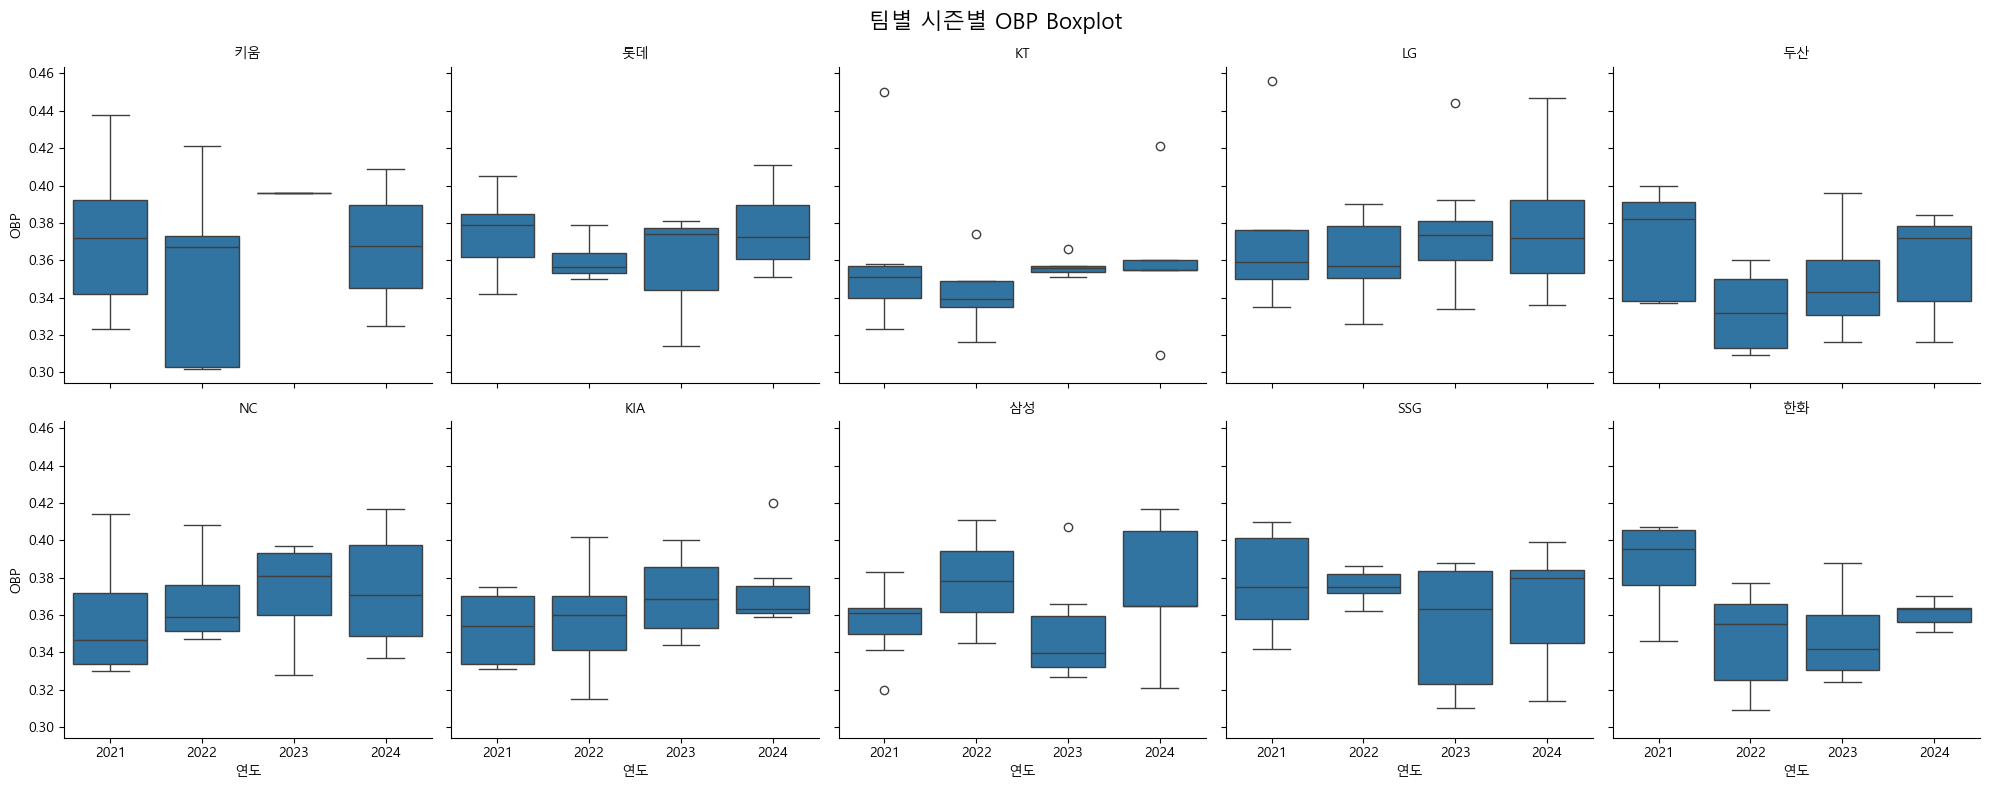

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

# 팀별 OBP Boxplot을 연도 기준으로 나눔
g = sns.FacetGrid(df, col='팀명', col_wrap=5, height=4, sharey=True)
g.map_dataframe(sns.boxplot, x='연도', y='OBP')
g.set_titles(col_template="{col_name}")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('팀별 시즌별 OBP Boxplot', fontsize=16)
plt.tight_layout()
plt.show()

### [4] 팀별 OPS 히스토그램

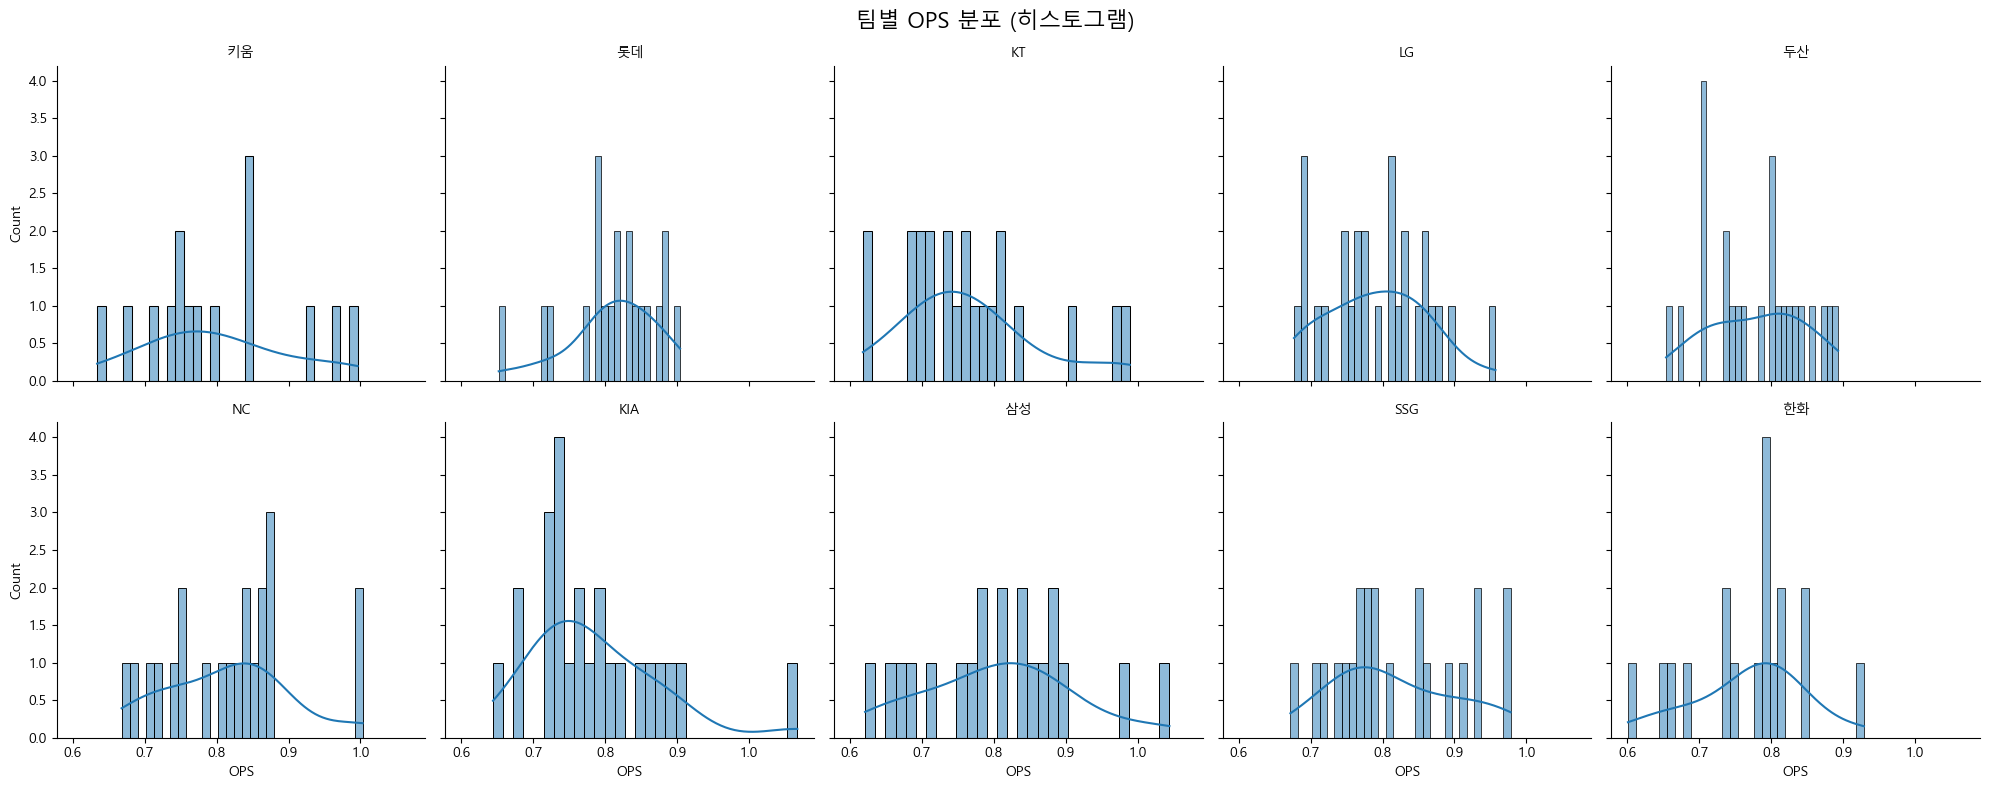

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

# 팀별 OPS 분포 시각화 (히스토그램)
g = sns.FacetGrid(df, col='팀명', col_wrap=5, height=4, sharex=True, sharey=True)
g.map_dataframe(sns.histplot, x='OPS', bins=30, kde=True)
g.set_titles(col_template="{col_name}")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('팀별 OPS 분포 (히스토그램)', fontsize=16)
plt.tight_layout()
plt.show()
